In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

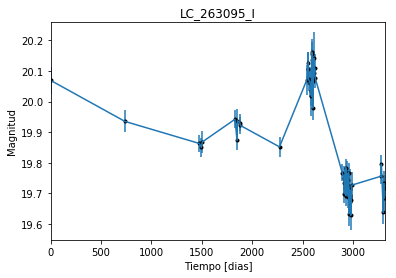

In [2]:
data = np.genfromtxt('LC_263095_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_263095_I')
plt.savefig("LC_263095_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

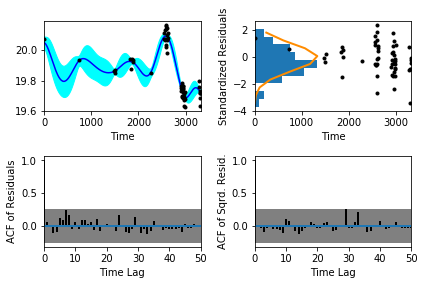

In [5]:
sample.assess_fit()

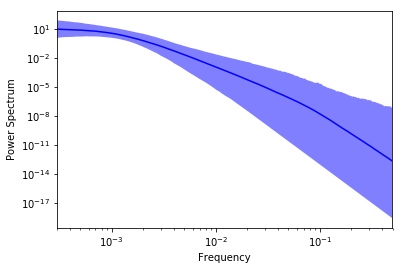

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

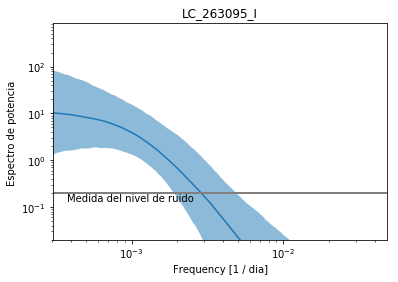

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_263095_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_263095_I')

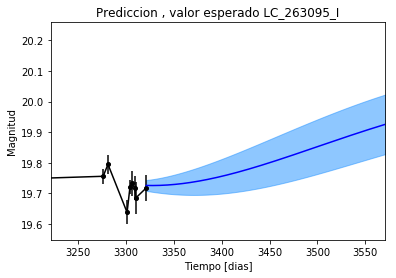

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_263095_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_263095_I')

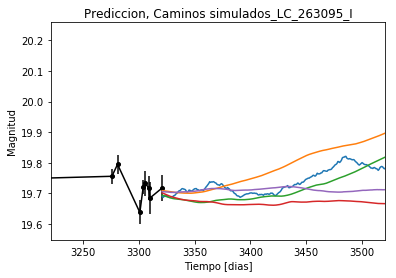

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_263095_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


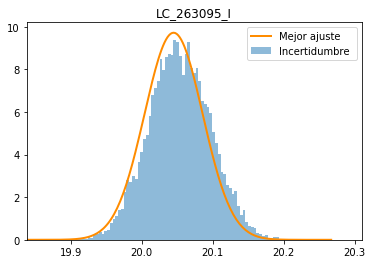

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_263095_I')
plt.savefig("Mejor_ajuste_LC_263095_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_263095_I')

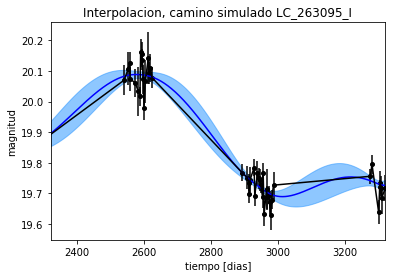

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_I')

Text(0.5,1,'Interpolacion, camino simulado LC_263095_I')

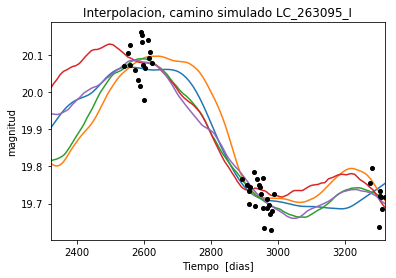

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_263095_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 456.201747722
Median: 0.0051885535324
Standard deviation: 0.171505866656
68% credibility interval: [ 0.00064178  0.11299639]
95% credibility interval: [  3.42670222e-04   7.08817768e-01]
99% credibility interval: [  3.09247724e-04   9.03374311e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 284.38412195
Median: 0.00120808567714
Standard deviation: 0.0801970290316
68% credibility interval: [ 0.00046431  0.01455246]
95% credibility interval: [ 0.00032121  0.23114327]
99% credibility interval: [  3.05057883e-04   6.02272355e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1233.69506362
Median: 0.00990518520752
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 914.416785644
Median: 107.887504602
Standard deviation: 1.61912251218
68% credibility interval: [ 106.04852033  109.05814328]
95% credibility interval: [ 103.65928752  109.80216564]
99% credibility interval: [ 101.61111736  110.13928836]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 424.119378401
Median: 0.484358303338
Standard deviation: 1.92049791386
68% credibility interval: [ 0.04737675  3.35112503]
95% credibility interval: [ 0.01365576  6.45075172]
99% credibility interval: [ 0.01016149  8.35674489]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 238.581630827
Median: 0.164495914197
Standard deviation: 7.81921180083
68% credibility interval: [  5.15132572e-03   5.45473577e+00]
95% credibility interval: [  4.5

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 17148.1520526
Median: 3.50962392629e-36
Standard deviation: 3.83651720133e+94
68% credibility interval: [  1.07336144e-97   8.88541709e-05]
95% credibility interval: [  3.02995059e-162   3.63022981e+027]
99% credibility interval: [  5.66626804e-170   2.27558906e+087]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3181.31589239
Median: 19.8909994994
Standard deviation: 0.0818105609646
68% credibility interval: [ 19.82856608  19.95780777]
95% credibility interval: [ 19.73473592  20.06308366]
99% credibility interval: [ 19.60599057  20.15550343]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 659.434287247
Median: 0.00113048899794
Standard deviation: 0.231386217113
68% credibility interval: [ 0.          0.28264662]
95% credibility interval: [ 0.          0.84411036]
99% credibility interval: [ 0.          0.95522551]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 659.434287247
Median: 0.00113048899794
Standard deviation: 0.231386217113
68% credibility interval: [ 0.          0.28264662]
95% credibility interval: [ 0.          0.84411036]
99% credibility interval: [ 0.          0.95522551]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 672.226788762
Median: 0.0
Standard deviation: 0.000460379835591
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 914.416785644
Median: 107.887504602
Standard deviation: 1.61912251218
68% credibility interval: [ 106.04852033  109.05814328]
95% credibility interval: [ 103.65928752  109.80216564]
99% credibility interval: [ 101.61111736  110.13928836]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2027.18216434
Median: 0.023553015726
Standard deviation: 0.0356371088616
68% credibility interval: [ 0.01345251  0.04897134]
95% credibility interval: [ 0.00840548  0.11886786]
99% credibility interval: [ 0.00644935  0.23190221]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2321.05944992
Median: 1.12139701725
Standard deviation: 0.169451323412
68% credibility interval: [ 0.96833175  1.30108852]
95% credibility interval: [ 0.8526454   1.50767877]
99% credibility interval: [ 0.77229716  1.65375889]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 893.024072807
Median: 2.65444419268e-05
Standard deviation: 0.0227046115372
68% credibility interval: [  1.95103726e-07   1.07756469e-03]
95% credibility interval: [  9.75390585e-33   1.25907100e-02]
99% credibility interval: [  6.50107738e-93   1.15836392e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 456.201747722
Median: (-0.0326006433203-1.71726437623j)
Standard deviation: 1.80966474412
68% credibility interval: [-0.70997729 -3.71065440e+00j -0.00403245 -3.67153320e-04j]
95% credibility interval: [ -4.45363338e+00-1.95759191j  -2.15306051e-03-0.00596837j]
99% credibility interval: [ -5.67606820e+00+0.j          -1.94306076e-03-0.00210736j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 284.38412195
Median: (-0.00759062617641+0j)
Standard deviation: 1.53868967111
68% credibility interval: [-0.09143583+0.j         -0.00291737+0.00666106j]
95% credibility interval: [-1.45231597+2.61650131j -0.00201824+0.01671186j]
99% credibility interval: [ -3.78418881e+00+4.31413798j  -1.91673521e-03+0.j        ]
Posterior summar